In [1]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly 
import plotly.express as px

% matplotlib inline

In [2]:
df = pd.read_csv("/content/articles.csv", encoding='latin-1')
df.head()

,author,claps,reading_time,link,title,text
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T..."
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If youâve ever found yourself looking up the...
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python â To...,Machine learning is increasingly moving from h...
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch â Insigh...,Want to learn about applied Artificial Intelli...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    object
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


In [4]:
fig1 = px.line(df, x='reading_time', y='claps')
fig1.show()

In [5]:
df['len_text'] = df['text'].str.len()

In [6]:
df['len_title'] = df['title'].str.len()

In [7]:
df.head()

,author,claps,reading_time,link,title,text,len_text,len_title
0,Justin Lee,8.3K,11,https://medium.com/swlh/chatbots-were-the-next...,Chatbots were the next big thing: what happene...,"Oh, how the headlines blared:\nChatbots were T...",12299,75
1,Conor Dewey,1.4K,7,https://towardsdatascience.com/python-for-data...,Python for Data Science: 8 Concepts You May Ha...,If youâve ever found yourself looking up the...,7776,58
2,William Koehrsen,2.8K,11,https://towardsdatascience.com/automated-featu...,Automated Feature Engineering in Python â To...,Machine learning is increasingly moving from h...,14102,64
3,Gant Laborde,1.3K,7,https://medium.freecodecamp.org/machine-learni...,Machine Learning: how to go from Zero to Hero ...,If your understanding of A.I. and Machine Lear...,8184,62
4,Emmanuel Ameisen,935,11,https://blog.insightdatascience.com/reinforcem...,Reinforcement Learning from scratch â Insigh...,Want to learn about applied Artificial Intelli...,13810,52


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



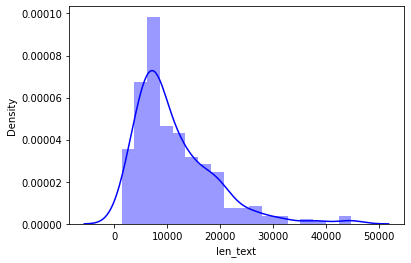

In [14]:
sns.distplot(df['len_text'], color='b')
plt.show()

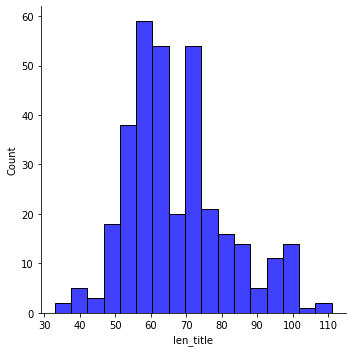

In [16]:
sns.displot(df['len_title'], color="b")
plt.show()

In [18]:
df['claps'] = df['claps'].apply(lambda s: int(float(s[:-1]) * 1000) if s[-1] == 'K' else int(s))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



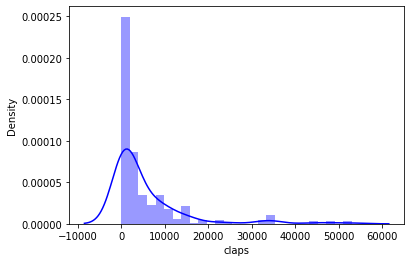

In [19]:
sns.distplot(df['claps'], color="b")
plt.show()

In [21]:
fig5 = px.scatter(df, y='claps', x='reading_time')
fig5.show()

In [22]:
fig6 = px.scatter(df, y='claps', x='len_title')
fig6.show()

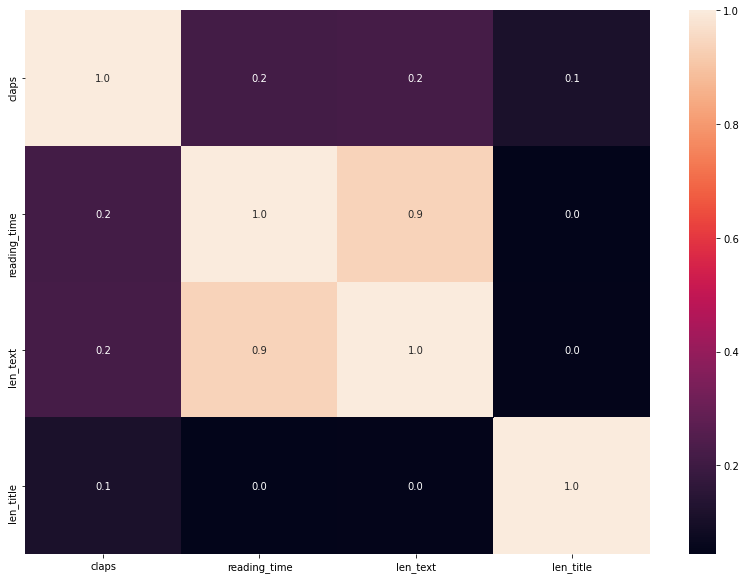

In [27]:
%matplotlib inline

f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(),annot = True,fmt = ".1f",ax = ax)
plt.show()

In [28]:
# Finding top articls
df[df['claps'] >= df['claps'].quantile(0.95)][['author', 'title', 'claps']]

,author,title,claps
13,Adam Geitgey,Machine Learning is Fun! â Adam Geitgey â ...,35000
16,Xiaohan Zeng,I interviewed at five top companies in Silicon...,48000
20,Michael Jordan,Artificial Intelligence â The Revolution Has...,34000
36,Adam Geitgey,Machine Learning is Fun! â Adam Geitgey â ...,35000
65,Xiaohan Zeng,I interviewed at five top companies in Silicon...,48000
68,Vishal Maini,A Beginnerâs Guide to AI/ML ð¤ð¶ â Mac...,32000
70,Sophia Ciocca,How Does Spotify Know You So Well? â Member ...,53000
72,Andrej Karpathy,Software 2.0 â Andrej Karpathy â Medium,35000
74,Netflix Technology Blog,Artwork Personalization at Netflix â Netflix...,25000
75,Michael Jordan,Artificial Intelligence â The Revolution Has...,34000


In [29]:
df_author = df.groupby(['author']).mean().reset_index()

In [30]:
df_top30 = df_author.sort_values(ascending=False, by='claps')[:30]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



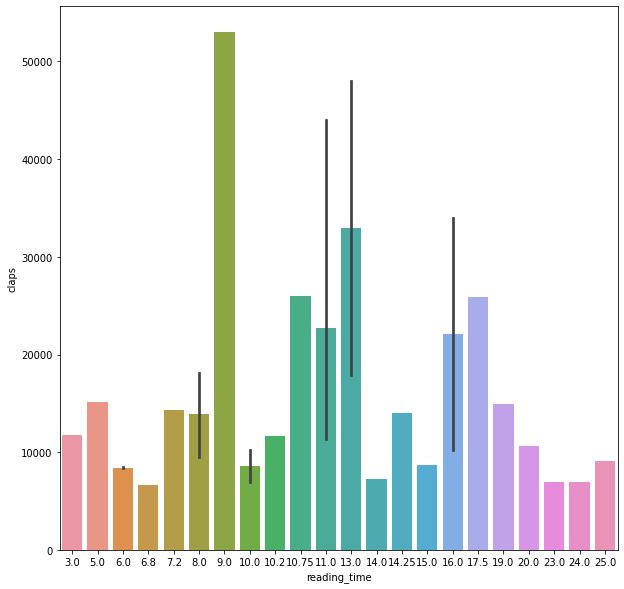

In [31]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot('reading_time', 'claps', data=df_top30)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



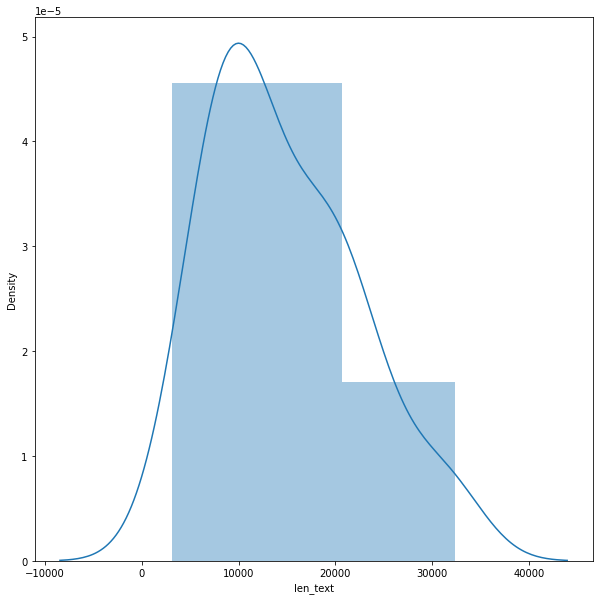

In [34]:
a4_dims = (10, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df_top30['len_text'])
plt.show()